In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'/home/arnavgupta829/Desktop/ELL409/Assignment2/OldFaithful.csv')
raw_ = []
for i in data.columns:
    raw_.append(data[i])
raw = np.asarray(raw_)
raw = raw.transpose()

In [3]:
class Kmeans:
    
    def __init__(self, k, iterations, dim, exmplsNos):
        self.exmplsNos = exmplsNos
        self.k  = k
        self.iterations = iterations
        self.dim = dim
        self.centroids = []
        self.labels = np.zeros(exmplsNos)
        
    def initialiseCentroids(self, datapoints):
        np.random.shuffle(datapoints)
        for i in range(0, self.k):
            self.centroids.append(datapoints[i])
    
    def computeDistance(self, centroid, datapoint):
        return np.linalg.norm(centroid-datapoint)
    
    def assignLabels(self, datapoints):
        for i in range(0, self.exmplsNos):
            distances = []
            for j in range(0, self.k):
                distances.append(self.computeDistance(self.centroids[j], datapoints[i]))
            self.labels[i] = np.argmin(distances, axis = 0)
        
    def updateCentroids(self, datapoints):
        for i in range(0, self.k):
            sumData = 0
            sumNos = 0
            for j in range(0, self.exmplsNos):
                if(self.labels[j] == i):
                    sumData += datapoints[j]
                    sumNos += 1
            self.centroids[i] = sumData/sumNos
    
    def converge(self, datapoints):
        self.initialiseCentroids(datapoints)
        self.assignLabels(datapoints)
        for i in range(0, self.iterations):
            self.updateCentroids(datapoints)
            self.assignLabels(datapoints)

[array([ 2.09433, 54.75   ]), array([ 4.29793023, 80.28488372])]


Text(0.5, 1.0, 'Visualization of clustered data')

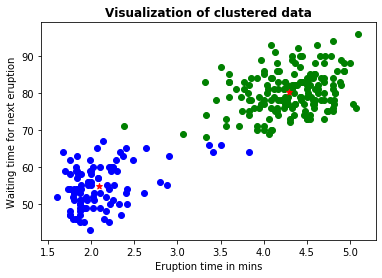

In [7]:
kmeans = Kmeans(2, 100, len(raw[0]), len(raw))
kmeans.converge(raw)
x0 = []
y0 = []
x1 = []
y1 = []
for i in range(0, kmeans.exmplsNos):
    if(kmeans.labels[i] == 0):
        x0.append(raw[i, 0])
        y0.append(raw[i, 1])
    else:
        x1.append(raw[i, 0])
        y1.append(raw[i, 1])
print(kmeans.centroids)
plt.scatter(x0, y0, c="blue")
plt.scatter(x1, y1, c="green")
plt.scatter(np.array(kmeans.centroids)[:, 0], np.array(kmeans.centroids)[:, 1], marker="*", c="red")
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time for next eruption')
plt.title('Visualization of clustered data', fontweight='bold')